# Загрузка датасета и первый взгляд

In [1]:
!mkdir data
!wget https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem5/zhestov.ea%40phystech.edu.csv -O data/data.csv

--2021-03-09 15:24:17--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem5/zhestov.ea%40phystech.edu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5103 (5.0K) [text/plain]
Saving to: ‘data/data.csv’

data/data.csv       100%[===================>]   4.98K  --.-KB/s    in 0s      

2021-03-09 15:24:17 (58.1 MB/s) - ‘data/data.csv’ saved [5103/5103]



In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

In [5]:
data = pd.read_csv('data/data.csv', header=None)

In [6]:
data.head()

,0,1
0,-1.761398,0.859068
1,-0.005979,-5.072595
2,0.091872,-5.450746
3,0.749937,-9.890471
4,0.032373,-3.607964


In [14]:
data.tail()

,0,1
95,1.457549,-10.068325
96,0.299191,15.237733
97,-0.244373,3.869600
98,0.770442,4.052045
99,99999.000000,6.523801


In [8]:
data.describe()

,0,1
count,100.000000,100.000000
mean,999.861364,-0.152903
std,9999.913043,9.088353
min,-2.902767,-20.321135
25%,-0.732114,-6.005390
50%,-0.032199,-0.174413
75%,0.532761,6.307172
max,99999.000000,21.780008


Крайне забавный датасет

# Задание
## Вопрос 1
Существует ли линейная взаимосвязь между столбцами выборки по t-критерию Стьюдента?

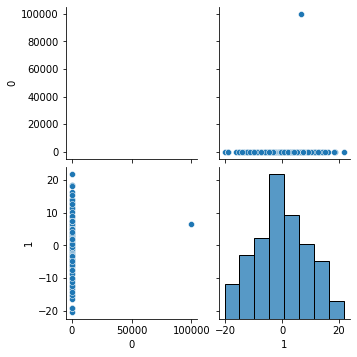

In [19]:
sns.pairplot(data)

In [24]:
r, pvalue = st.pearsonr(data[0], data[1])
print(f'R = {r:0.3}; p-value = {pvalue:0.3}')

R value = 0.0742; p-value = 0.463


Не существует, судя по p-value и графичкам.

## Вопрос 2
Существует ли линейная взаимосвязь между столбцами выборки по t-критерию Стьюдента, если исключить выбросы из выборки?

Дропнем выбросы

In [26]:
data_dropped = data[(np.abs(st.zscore(data)) < 3).all(axis=1)]
data_dropped.describe()

,0,1
count,99.000000,99.000000
mean,-0.129935,-0.220345
std,1.000769,9.109420
min,-2.902767,-20.321135
25%,-0.734169,-6.027386
50%,-0.035873,-0.268475
75%,0.524302,6.067021
max,2.025549,21.780008


Посмотрим на то, что вышло

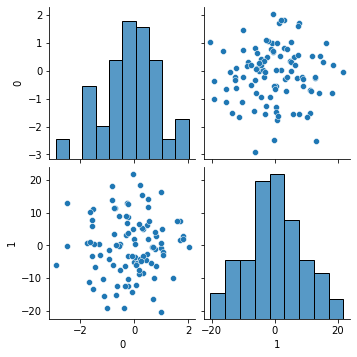

In [29]:
sns.pairplot(data_dropped)

In [27]:
r, pvalue = st.pearsonr(data_dropped[0], data_dropped[1])
print(f'R = {r:0.3}; p-value = {pvalue:0.3}')

R value = 0.0326; p-value = 0.749


Судя по коэффициентам и графичкам, связи не существует.

## Вопрос 3
Коэффициент корреляции Кендалла по исходной выборке (без удаления выбросов)

In [35]:
corr, pvalue = st.kendalltau(data[0], data[1])
print(f'Corr = {corr:.3}; p-value = {pvalue:.3}')

Corr = 0.0396; p-value = 0.559
